# Projet 4

# Table of contents


1. [Introduction](#1.-Introduction)

    1.1. [Import des librairies](#1.1.-Import-des-librairies)
    
    1.2. [Import des DF](#1.2.-Import-des-DF)
    
    
2. [Première partie - Demandes de Marc](#2.-Première-partie-Demandes-de-Marc)

    2.1 [Proportion de personnes en état de sous-nutrition](#2.1-Proportion-de-personnes-en-état-de-sous-nutrition)
    
    2.2 [Nombre théorique de personnes qui pourraient être nourries (à partir de la disponibilité alimentaire mondiale)](#2.2-Nombre-théorique-de-personnes-qui-pourraient-être-nourries-(à-partir-de-la-disponibilité-alimentaire-mondiale)
    
    2.3 [Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale des produits végétaux](#2.3-Nombre-théorique-de-personnes-qui-pourraient-être-nourries-à-partir-de-la-disponibilité-alimentaire-mondiale-des-produits-végétaux)
    
    2.4 [Utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine](#2.4-Utilisation-de-la-disponibilité-intérieure,-en-particulier-la-part-qui-est-attribuée-à-l’alimentation-animale,-celle-qui-est-perdue-et-celle-qui-est-concrètement-utilisée-pour-l'alimentation-humaine)
    
    
3. [Deuxième partie - Demandes de Julien](#3.-Deuxième-partie-Demandes-de-Julien)

    3.1[Calcul de la disponibilité intérieure](#3.1-Calcul-de-la-disponibilité-intérieure)
    
    3.2[Utilisation des céréales: répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux](#3.2-Utilisation-des-céréales:-répartition-entre-l’alimentation-humaine-(colonne-Nourriture)-et-l’alimentation-pour-animaux)
    
    3.3[Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition (exportation VS production)](#3.3-Utilisation-du-manioc-par-la-Thaïlande-aux-égards-de-la-proportion-de-personnes-en-sous-nutrition-(exportation-VS-production))
    
    
4. [Troisième partie - Demandes de Mélanie](#4.-Troisième-partie-Demandes-de-Mélanie)

    4.1[Pays les plus touchés par la sous-alimentation en 2017](#4.1-Pays-les-plus-touchés-par-la-sous-alimentation-en-2017)
    
    4.2[Pays ayant le plus bénéficié d'aides depuis 2013](#4.2-Pays-ayant-le-plus-bénéficié-d'aides-depuis-2013)
    
    4.3[Pays ayant le plus/le moins de disponibilité/habitant](#4.3-Pays-ayant-le-plus/le-moins-de-disponibilité/habitant)
    
    
5. [Conclusion](#5.Conclusion)


# 1. Introduction

## 1.1. Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.2. Import des DF

In [2]:
aide_alim = pd.read_csv('aide_alimentaire.csv')
sous_nut = pd.read_csv('sous_nutrition.csv')
dispo_alim = pd.read_csv('dispo_alimentaire.csv')
population = pd.read_csv('population.csv')

# 2. Première partie - Demandes de Marc

## 2.1 Proportion de personnes en état de sous-nutrition 

In [3]:
#Lecture du DF sous nutrition
sous_nut.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [4]:
#Toutes les variables sont en format 'object', alors que la variable 'Valeur' devrait être en float
sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [5]:
#Après tentaive de changer le format 'Valeur' en Float: message d'erreur sur les valeurs '<0.1'
#Modification des '<0.1' qui correspondent à un format 'object' afin de pouvoir changer le format de la colonne 'Valeur' en float
sous_nut.loc[sous_nut['Valeur'] == '<0.1', 'Valeur'] = 0

In [6]:
#Changement de format en Float
sous_nut['Valeur'] = sous_nut['Valeur'].astype(float)

In [7]:
#Vérification de la présence de Valeurs manquantes dans ce DF:
sous_nut.loc[sous_nut['Valeur'].isnull(), :]

,Zone,Année,Valeur
24,Allemagne,2012-2014,NaN
25,Allemagne,2013-2015,NaN
26,Allemagne,2014-2016,NaN
27,Allemagne,2015-2017,NaN
28,Allemagne,2016-2018,NaN
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [8]:
#Suppression des valeurs manquantes qui n'ont pas d'utilité ici
sous_nut.dropna(subset=['Valeur'], inplace= True)

In [9]:
#Affichage des Valeurs en Million afin d'être alligné avec le DF population
sous_nut['Valeur'] = (sous_nut['Valeur'] * 1000000)
sous_nut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1195,Viet Nam,2013-2015,8300000.0
1196,Viet Nam,2014-2016,7600000.0
1197,Viet Nam,2015-2017,7100000.0
1198,Viet Nam,2016-2018,6500000.0


In [10]:
#Création du DF pour la sous nutrition uniquement sur l'année 2017
df_sous_nut_2017 = sous_nut.loc[sous_nut['Année'] == '2016-2018', :]

In [11]:
#Affichage des Valeurs en Million sur le DF population afin d'être alligné avec le DF sous_nutrition
population['Valeur'] = (population['Valeur'] * 1000)
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [12]:
#Création du DF pour la population uniquement sur l'année 2017
df_population_2017 = population.loc[population['Année'] == 2017, :]
df_population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [13]:
#Jointure des deux fichiers sur les données 2017
df_données_2017 = pd.merge(df_sous_nut_2017, df_population_2017, on='Zone', how='outer')
df_données_2017.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Angola,2016-2018,5800000.0,2017,29816766.0


In [14]:
#Calcul de la somme des personnes en sous nutrition dans le monde en 2017
sous_nut_somme = df_données_2017['Valeur_x'].sum()
sous_nut_somme

535700000.0

In [15]:
#Calcul de la population mondiale en 2017
population_somme = df_données_2017['Valeur_y'].sum()
population_somme

7548134111.0

In [16]:
# Requête 1: Proportion de personnes en état de sous nutrition dans le monde en 2017 (en%)
proportion_personne_en_sous_nutrition = round ((sous_nut_somme) / (population_somme) * 100, 2)
proportion_personne_en_sous_nutrition

7.1

## 2.2 Nombre théorique de personnes qui pourraient être nourries (à partir de la disponibilité alimentaire mondiale):

In [17]:
#Jointure des fichiers dispo_alimentaire et population mondiale en 2017 pour calculer la 'disponibilité alimentaire mondiale'
dispo_alim_mondiale = pd.merge(dispo_alim, df_population_2017, on='Zone', how='outer')
dispo_alim_mondiale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15664,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910763.0
15665,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641034.0
15666,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1300.0
15667,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101998.0


In [18]:
#Création de la variable 'dispo_alim_par pays' dans le DF 'dispo_alim_mondiale'
dispo_alim_mondiale['dispo_alim_par_pays'] = dispo_alim_mondiale['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim_mondiale['Valeur']
dispo_alim_mondiale


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_alim_par_pays
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15664,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910763.0,NaN
15665,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641034.0,NaN
15666,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1300.0,NaN
15667,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101998.0,NaN


In [19]:
#Somme de la disponibilité alimentaire mondiale 
somme_dispo_alim_mondiale = dispo_alim_mondiale['dispo_alim_par_pays'].sum()
somme_dispo_alim_mondiale

20918984627331.0

In [20]:
#Déterminer le besoin en kcal moyen /personne/jour
valeur_energetique = 2500

In [21]:
#Calcul du nombre théorique de personnes qui pourraient être nourries (division par le besoin en kcal moyen /personne/jour)
requete_2_result = somme_dispo_alim_mondiale / valeur_energetique
requete_2_result

8367593850.9324

In [22]:
#En pourcentage de la population mondiale (qui pourraient être nourries)
round ((requete_2_result) / ((df_population_2017['Valeur']).sum()) * 100, 2)

110.86

## 2.3 Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale des produits végétaux:

In [23]:
#Création du DF de la disponibilité alimentaire mondiale, filtrée sur le Végétale uniquement
dispo_alim_vegetale = dispo_alim_mondiale.loc[(dispo_alim_mondiale['Origine'] == 'vegetale'), :]
dispo_alim_vegetale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_alim_par_pays
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0


In [24]:
#Création de la variable 'dispo_alim_par_pays_vegetale' en fonction de la population de chaque pays
dispo_alim_vegetale['dispo_alim_par_pays_vegetale'] = dispo_alim_vegetale['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim_vegetale['Valeur']
dispo_alim_vegetale

C:\Users\leuriot\AppData\Local\Temp\ipykernel_15892\3436870635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alim_vegetale['dispo_alim_par_pays_vegetale'] = dispo_alim_vegetale['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim_vegetale['Valeur']


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_alim_par_pays,dispo_alim_par_pays_vegetale
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296113.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,145184452.0,145184452.0
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,NaN,NaN,0.0,0.01,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636039.0,0.0,0.0
15596,Îles Salomon,Thé,vegetale,NaN,NaN,0.0,0.17,NaN,0.04,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636039.0,0.0,0.0
15597,Îles Salomon,Tomates,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636039.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636039.0,0.0,0.0


In [25]:
#Calcul de la somme de la disponibilité alimentaire végétale mondiale
somme_dispo_alim_par_pays_vegetale = dispo_alim_vegetale['dispo_alim_par_pays_vegetale'].sum()
somme_dispo_alim_par_pays_vegetale

17260764211501.0

In [26]:
#Calcul du nombre théorique de personnes qui pourraient être nourries, uniquement avec la disponibilité alimentaire végétale mondiale
#(division par le besoin en kcal moyen /personne/jour)
requete_3_result = (somme_dispo_alim_par_pays_vegetale) / valeur_energetique
requete_3_result

6904305684.6004

In [27]:
#En pourcentage de la population mondiale (qui pourraient être nourries)
round ((requete_3_result) / ((df_population_2017['Valeur']).sum()) * 100, 2)

91.47

## 2.4 Utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine:

In [28]:
#Réponse à la 1ère requête de Julien:
#1ère façon de calculer la dispobilité intérieure:
dispo_interieure_1 = dispo_alim['Production'].sum() + dispo_alim['Importations - Quantité'].sum() + dispo_alim['Variation de stock'].sum() - dispo_alim['Exportations - Quantité'].sum()
dispo_interieure_1

9849173.0

In [29]:
#2ème façon de calculer la dispobilité intérieure par catégorie d'utilisation (en milliers de tonnes)
dispo_interieure_2 = dispo_alim[['Nourriture'] + ['Pertes'] + ['Semences'] + ['Traitement'] + ['Aliments pour animaux'] + ['Autres Utilisations']].sum()
dispo_interieure_2

Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
dtype: float64

In [30]:
#Total de la disponibilité interieure (méthode 2)
Total_dispo_interieure = (dispo_interieure_2).sum()
Total_dispo_interieure

9858592.0

In [31]:
#Total de la disponibilité interieure par catégorie d'utilisation, en %
requete_4_result = round ((dispo_interieure_2) / (Total_dispo_interieure) * 100, 2) 
requete_4_result

Nourriture               49.46
Pertes                    4.60
Semences                  1.57
Traitement               22.36
Aliments pour animaux    13.23
Autres Utilisations       8.77
dtype: float64

In [32]:
#Création d'un index
requete_4_result[0]

49.46

Text(0.5, 1.0, 'Utilisation de la disponibilité intérieure')

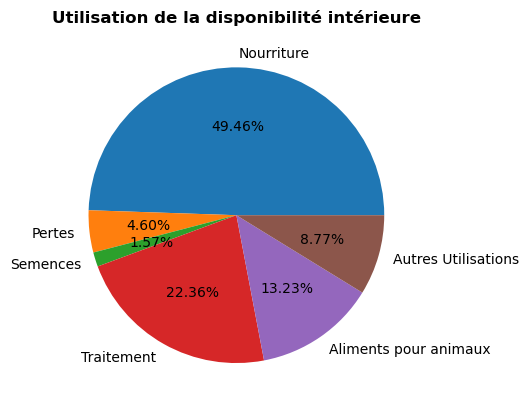

In [33]:
#Création d'un graphique pour illustrer la requête 4 de Marc
plt.pie(x=requete_4_result, labels=requete_4_result.index, autopct='%.2f%%')
plt.title('Utilisation de la disponibilité intérieure', fontweight = 'bold')

# 3. Deuxième partie - Demandes de Julien

## 3.1 Calcul de la disponibilité intérieure 

## 3.2 Utilisation des céréales: répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux

In [34]:
#Sélection de tous les "produits" du DF dispo_alim pour avoir une vue d'ensemble pour comparer avec les données de la FAO
dispo_alim_mondiale['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [35]:
#Création d'une liste des Céréales à l'aide du Site FAO 
#(attention j'ai adapté l'écriture pour que cela "colle" aux données de notre DF)
Cereales = ['Avoine', 'Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Millet', 'Céréales, Autres', 'Seigle', 'Sorgho']
Cereales

['Avoine',
 'Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Millet',
 'Céréales, Autres',
 'Seigle',
 'Sorgho']

In [36]:
#Création d'un DF céréales à partir du DF disponibilité alimentaire
df_cereales = dispo_alim.loc[dispo_alim['Produit'].isin(Cereales), :]
df_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0


In [37]:
#Calcul de la dispobilité intérieure des céréales par catégorie d'utilisation (en milliers de tonnes)
dispo_interieure_cereales = df_cereales[['Nourriture'] + ['Pertes'] + ['Semences'] + ['Traitement'] + ['Aliments pour animaux'] + ['Autres Utilisations']].sum()
dispo_interieure_cereales

Nourriture               1029010.0
Pertes                    107120.0
Semences                   68538.0
Traitement                 94589.0
Aliments pour animaux     873535.0
Autres Utilisations       234787.0
dtype: float64

In [38]:
#Total de la disponibilité interieure des céréales 
Total_dispo_interieure_cereales = (dispo_interieure_cereales).sum()
Total_dispo_interieure_cereales

2407579.0

In [39]:
#Total de la disponibilité interieure par catégorie d'utilisation (en %)
Requete_utilisation_cereales = round ((dispo_interieure_cereales) / (Total_dispo_interieure_cereales) * 100, 2)
Requete_utilisation_cereales

Nourriture               42.74
Pertes                    4.45
Semences                  2.85
Traitement                3.93
Aliments pour animaux    36.28
Autres Utilisations       9.75
dtype: float64

In [40]:
#Création d'un index
Requete_utilisation_cereales[0]

42.74

([<matplotlib.patches.Wedge at 0x1cc2c71abe0>,
 [Text(0.2487179548825423, 1.0715126592434856, 'Nourriture'),
  Text(-1.0454121643376837, 0.3422183610719915, 'Pertes'),
  Text(-1.0958375723054539, 0.09560342631772864, 'Semences'),
  Text(-1.091282789013686, -0.13820953079477202, 'Traitement'),
  Text(-0.19864644835822054, -1.0819147787855867, 'Aliments pour animaux'),
  Text(1.048799632096549, -0.33169162141082753, 'Autres Utilisations')],
 [Text(0.13566433902684125, 0.5844614504964466, '42.74%'),
  Text(-0.5702248169114638, 0.1866645605847226, '4.45%'),
  Text(-0.5977295848938838, 0.052147323446033796, '2.85%'),
  Text(-0.5952451576438287, -0.07538701679714838, '3.93%'),
  Text(-0.10835260819539301, -0.5901353338830473, '36.28%'),
  Text(0.5720725265981175, -0.1809227025877241, '9.75%')])

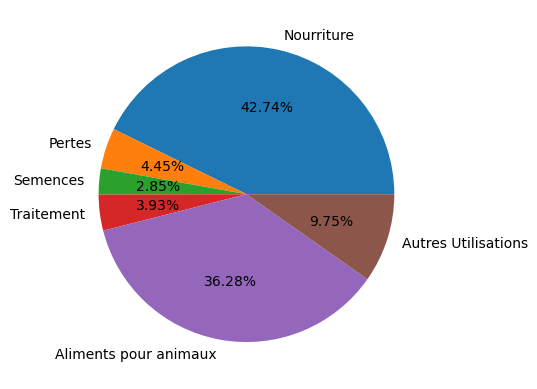

In [41]:
#Création du graphique représentatif (requête 2 de Julien)
plt.pie(x=Requete_utilisation_cereales, labels=Requete_utilisation_cereales.index, autopct='%.2f%%')

## 3.3 Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition (exportation VS production)

In [42]:
#Sélection de la Thailande dans le DF créé plus haut sur la proportion de personnes en sous nutrition (Requête 3 Julien)
df_Thailande = df_données_2017.loc[df_données_2017['Zone'] == 'Thaïlande', :]
df_Thailande

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
95,Thaïlande,2016-2018,6200000.0,2017,69209810.0


In [43]:
#Proportion de personnes en état de sous nutrition en Thailande en 2017 (en%)
Sous_nut_Thailande = round (df_Thailande['Valeur_x'] / df_Thailande['Valeur_y'] * 100, 2)
Sous_nut_Thailande

95    8.96
dtype: float64

In [44]:
#Sélection du produit 'Manioc' en Thailande dans le DF dispo_alim_mondiale
df_Manioc_Thailande = dispo_alim_mondiale.loc[(dispo_alim_mondiale['Produit'] == 'Manioc') & (dispo_alim_mondiale['Zone'] == 'Thaïlande') , :]
df_Manioc_Thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_alim_par_pays
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2017.0,69209810.0,2.768392e+09


In [45]:
df_Manioc_Thailande['Exportations - Quantité']

13809    25214.0
Name: Exportations - Quantité, dtype: float64

In [46]:
#Proportion des exportations de Manioc par la Thailande par rapport à leur production (en %)
round (df_Manioc_Thailande['Exportations - Quantité'] / df_Manioc_Thailande['Production'] * 100, 2)

13809    83.41
dtype: float64

In [47]:
#Calcul du nombre théorique de la population thailandaise qui pourrait être nourrie avec la production de Manioc par la Thailande
#Création de la variable représentant la valeur énergétique pour 1 Tonne de Manioc en kcal (100gr de Manioc = 157 kcal) afin de comparer avec la production exprimée en millier de Tonnes
VN_Manioc = 1570000

In [48]:
#Calcul de la production de Manioc par la Thailande en terme de calories
#Ramené à une journée pour comparer avec la "valeur énergétique"
Manioc_total_kcal = df_Manioc_Thailande['Production'] *1000 * VN_Manioc / 365
Manioc_total_kcal

13809    1.300218e+11
Name: Production, dtype: float64

In [49]:
#Nombre de personnes qui pourraient être nourries en terme de kcal acec "Manioc_total_kcal"
Nb_personnes = Manioc_total_kcal / valeur_energetique
Nb_personnes

13809    5.200872e+07
Name: Production, dtype: float64

In [50]:
#Ramené à la population de la Thailande (en %) 
round (Nb_personnes / df_Manioc_Thailande['Valeur'] * 100, 2 )

13809    75.15
dtype: float64

# 4. Troisième partie - Demandes de Mélanie

## 4.1. Pays les plus touchés par la sous-alimentation en 2017

In [51]:
#Affichage du DF concernant le merge des données sous-nutrition 2017 et population 2017, créé plus haut (requête 1 Mélanie)
df_données_2017

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Angola,2016-2018,5800000.0,2017,29816766.0
...,...,...,...,...,...
231,Tuvalu,NaN,NaN,2017,11370.0
232,Uruguay,NaN,NaN,2017,3436641.0
233,Yémen,NaN,NaN,2017,27834819.0
234,Zambie,NaN,NaN,2017,16853599.0


In [52]:
#Calcul de la proportion de personnes en sous_nutrition (à partir du DF 'données 2017')
df_données_2017['Valeur_x'] / df_données_2017['Valeur_y'] *100

0      28.928718
1       5.437666
2       3.467203
3       3.140917
4      19.452143
         ...    
231          NaN
232          NaN
233          NaN
234          NaN
235          NaN
Length: 236, dtype: float64

In [53]:
#Création de la variable 'Personnes_en_sous_nut(en%)' dans le DF 'données 2017'
df_données_2017['Personnes_en_sous_nut(en%)'] = df_données_2017['Valeur_x'] / df_données_2017['Valeur_y'] *100
df_données_2017

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Personnes_en_sous_nut(en%)
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.437666
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.467203
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.140917
4,Angola,2016-2018,5800000.0,2017,29816766.0,19.452143
...,...,...,...,...,...,...
231,Tuvalu,NaN,NaN,2017,11370.0,NaN
232,Uruguay,NaN,NaN,2017,3436641.0,NaN
233,Yémen,NaN,NaN,2017,27834819.0,NaN
234,Zambie,NaN,NaN,2017,16853599.0,NaN


In [54]:
#Suppression des valeurs manquantes
df_données_2017.dropna(subset=['Personnes_en_sous_nut(en%)'])

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Personnes_en_sous_nut(en%)
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.437666
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.467203
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.140917
4,Angola,2016-2018,5800000.0,2017,29816766.0,19.452143
...,...,...,...,...,...,...
99,Turkménistan,2016-2018,200000.0,2017,5757667.0,3.473629
100,Ukraine,2016-2018,1500000.0,2017,44487709.0,3.371718
101,Vanuatu,2016-2018,0.0,2017,285510.0,0.000000
102,Venezuela (République bolivarienne du),2016-2018,8000000.0,2017,29402484.0,27.208586


In [55]:
#Classement de la variable 'Personnes_en_sous_nut(en%)' par ordre dércoissant et affichage des 10 premières lignes
requete_1_melanie = df_données_2017.sort_values(by = 'Personnes_en_sous_nut(en%)', ascending = False)
answer = requete_1_melanie.head(10)
answer

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Personnes_en_sous_nut(en%)
41,Haïti,2016-2018,5300000.0,2017,10982366.0,48.259182
82,République populaire démocratique de Corée,2016-2018,12000000.0,2017,25429825.0,47.188685
57,Madagascar,2016-2018,10500000.0,2017,25570512.0,41.062924
55,Libéria,2016-2018,1800000.0,2017,4702226.0,38.279742
53,Lesotho,2016-2018,800000.0,2017,2091534.0,38.249438
94,Tchad,2016-2018,5700000.0,2017,15016753.0,37.957606
84,Rwanda,2016-2018,4200000.0,2017,11980961.0,35.055619
66,Mozambique,2016-2018,9400000.0,2017,28649018.0,32.810898
96,Timor-Leste,2016-2018,400000.0,2017,1243258.0,32.173531
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718


C:\Users\leuriot\AppData\Local\Temp\ipykernel_15892\3755425674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['Zone'][answer['Zone'] == 'République populaire démocratique de Corée'] = 'DPRK'


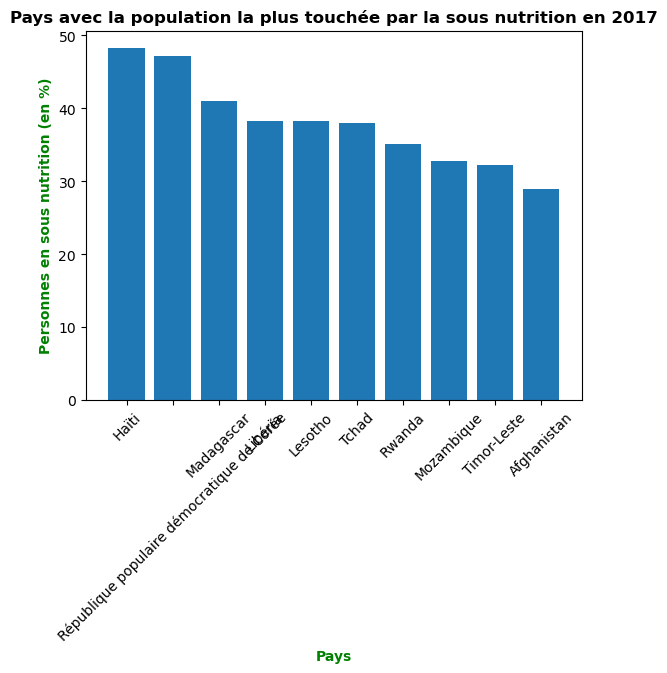

In [56]:
plt.bar(height=answer['Personnes_en_sous_nut(en%)'], x=answer['Zone'])
plt.title('Pays avec la population la plus touchée par la sous nutrition en 2017', fontweight = 'bold')
plt.xlabel('Pays', color = 'green', fontweight = 'bold')
plt.ylabel('Personnes en sous nutrition (en %)', color = 'green', fontweight = 'bold')
plt.xticks(rotation = 45)
answer['Zone'][answer['Zone'] == 'République populaire démocratique de Corée'] = 'DPRK'

## 4.2. Pays ayant le plus bénéficié d'aides depuis 2013

In [57]:
#affichage du DF aide alimentaire (requête 2 Mélanie)
aide_alim

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [58]:
#Classement par pays avec la somme des aides alimentaires reçues depuis 2013
aide_alim_par_pays = aide_alim.groupby('Pays bénéficiaire')['Valeur'].sum()
aide_alim_par_pays

Pays bénéficiaire
Afghanistan     185452
Algérie          81114
Angola            5014
Bangladesh      348188
Bhoutan           2666
                ...   
Zambie            3026
Zimbabwe         62570
Égypte            1122
Équateur          1362
Éthiopie       1381294
Name: Valeur, Length: 76, dtype: int64

In [59]:
#Classement du résultat par ordre décroissant et affichage des 15 pays ayant reçus le plus d'aide depuis 2013
requete_2_melanie = aide_alim_par_pays.sort_values(ascending = False)
requete_2_melanie.head(15)

Pays bénéficiaire
République arabe syrienne                     1858943
Éthiopie                                      1381294
Yémen                                         1206484
Soudan du Sud                                  695248
Soudan                                         669784
Kenya                                          552836
Bangladesh                                     348188
Somalie                                        292678
République démocratique du Congo               288502
Niger                                          276344
Tchad                                          267966
Pakistan                                       231072
République populaire démocratique de Corée     187412
Afghanistan                                    185452
République-Unie de Tanzanie                    172022
Name: Valeur, dtype: int64

In [60]:
graph = requete_2_melanie.head(15)
graph[0]

1858943

Text(0, 0.5, "Aides (en Million d'euros)")

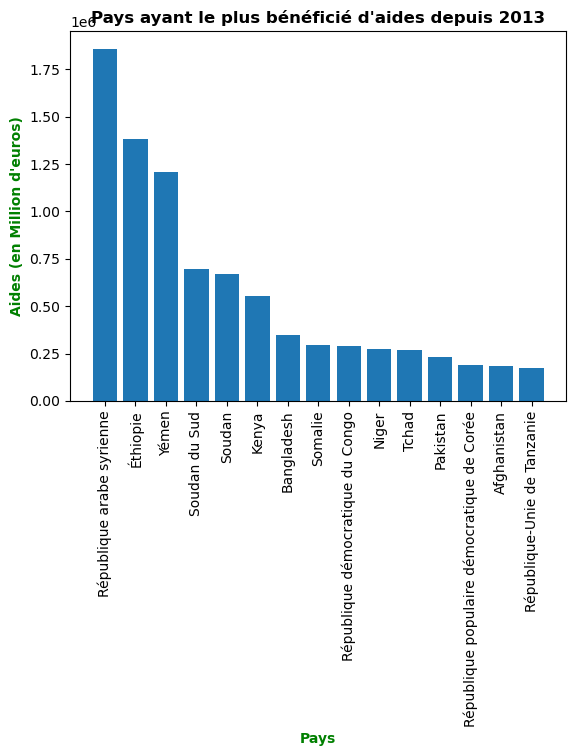

In [61]:
plt.bar(height=graph, x=graph.index)
plt.xticks(rotation = 90)
plt.title("Pays ayant le plus bénéficié d'aides depuis 2013", fontweight = 'bold')
plt.xlabel('Pays', color = 'green', fontweight = 'bold')
plt.ylabel("Aides (en Million d'euros)", color = 'green', fontweight = 'bold')

In [62]:
#Affichage des 6 premiers pays ayant bénéficiés d'aides alimentaires en 2017 à partir du DF "données 2017"
#On constate que ce ne sont pas forcément les pays ayant la plus grosse part de personnes en sous nutrition (même si elle reste importante)
#Pour d'autres pays nous n'avions pas les valeurs de la part de sous nutrition dans la population

df_données_2017.loc[(df_données_2017['Zone'] == 'République arabe syrienne') | (df_données_2017['Zone'] == 'Éthiopie') | (df_données_2017['Zone'] =='Yémen') | (df_données_2017['Zone'] =='Soudan du Sud') | (df_données_2017['Zone'] =='Soudan') | (df_données_2017['Zone'] =='Kenya'), : ]

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,Personnes_en_sous_nut(en%)
33,Éthiopie,2016-2018,21100000.0,2017,106399924.0,19.830841
50,Kenya,2016-2018,11900000.0,2017,50221142.0,23.695200
91,Soudan,2016-2018,5000000.0,2017,40813397.0,12.250879
197,République arabe syrienne,NaN,NaN,2017,17095678.0,NaN
222,Soudan du Sud,NaN,NaN,2017,10910763.0,NaN
233,Yémen,NaN,NaN,2017,27834819.0,NaN


## 4.3. Pays ayant le plus/le moins de disponibilité/habitant

In [63]:
#Affichage du DF disponibilités alimentaires (requête 3 Mélanie)
dispo_alim_mondiale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,dispo_alim_par_pays
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296113.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15664,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910763.0,NaN
15665,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641034.0,NaN
15666,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1300.0,NaN
15667,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101998.0,NaN


In [64]:
#Calcul du Total de disponibilité alimentaire en calories (kcal/personne/an) par pays
#Création de la variable 'Total_dispo_en_kcal'
Total_dispo_en_kcal = dispo_alim_mondiale.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
Total_dispo_en_kcal

Zone
Afghanistan                  2087.0
Afrique du Sud               3020.0
Albanie                      3188.0
Algérie                      3293.0
Allemagne                    3503.0
                              ...  
Îles Salomon                 2383.0
Îles Turques-et-Caïques         0.0
Îles Vierges américaines        0.0
Îles Vierges britanniques       0.0
Îles Wallis-et-Futuna           0.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 238, dtype: float64

In [65]:
#Classement et affichage des 10 pays ayant la plus importante disponibilité alimentaire en kcal / pers / jour
requete_3_desc = Total_dispo_en_kcal.sort_values(ascending = False)
requete_3_desc.head(10)

Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Irlande                  3602.0
Italie                   3578.0
Luxembourg               3540.0
Égypte                   3518.0
Allemagne                3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [66]:
#Classement et affichage des 10 pays ayant la plus faible disponibilité alimentaire en kcal / pers / jour
#Comme nous ne sommes pas sur de ce que représente les '0' on les enlève à l'étape suivante
requete_3_asc = Total_dispo_en_kcal.sort_values()
requete_3_asc.head()

Zone
Îles Wallis-et-Futuna              0.0
Saint-Martin (partie française)    0.0
Saint-Marin                        0.0
Saint-Barthélemy                   0.0
Sahara occidental                  0.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [67]:
#Classement et affichage des 10 pays ayant la plus faible disponibilité alimentaire en kcal/pers/jour, en filtrant pour enlever les'0'
requete_3_asc.loc[requete_3_asc > 0].head(10)

Zone
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Éthiopie                                      2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

# 5. Conclusion

## Evolution de la Sous-nutrition

In [68]:
#Affichage du DF sous nutrition et amélioration de l'écriture de la variable "Année"
sous_nut.head()
sous_nut['Année'].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'],['2013','2014','2015','2016','2017', '2018'], inplace = True)

In [69]:
#Agrégation par années en sommant le nombre de personnes en sous nutrition (en Millions)
sous_nut_annees = sous_nut.groupby(['Année'])['Valeur'].sum()
sous_nut_annees

Année
2013    528100000.0
2014    523500000.0
2015    524700000.0
2016    528600000.0
2017    535700000.0
2018    544200000.0
Name: Valeur, dtype: float64

In [70]:
#Création d'un index
sous_nut_annees[0]

528100000.0

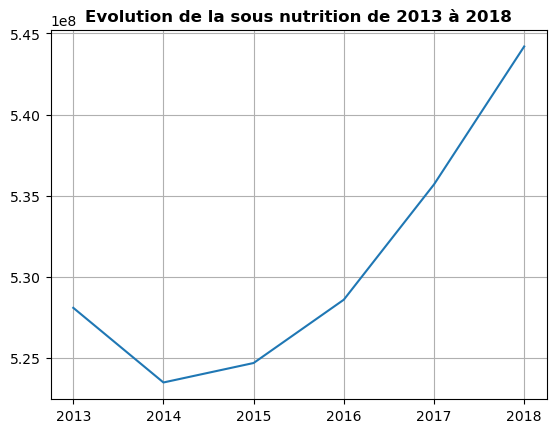

In [71]:
#Création d'une courbe pour illustrer l'évolution du nombre de personnes en sous nutrition dans le monde de 2013 à 2018
plt.plot(sous_nut_annees, label = 'sous_nut_annees')
plt.title('Evolution de la sous nutrition de 2013 à 2018', fontweight = 'bold')
plt.grid(True, which='both')